## ESG Analysis from 10-K Risk Factor Texts
In this analysis I apply natural language processing (NLP) techniques to extract, quantify and analyze Environmental (E), Social (S), and Governance (G) content within firms’ 10-K “Risk Factors” sections. The sample I used comprises the first 80 filings from the jlohding/sp500-edgar-10k dataset and focuses exclusively on the text disclosed under Item 1A: Risk Factors. Each filing is preprocessed by converting text to lowercase, removing punctuation, numbers, and English stopwords and then tokenising into words. To improve the accuracy of the linguistic representation I implemented a custom stop list that removes country and etnicity related terms frequently mentioned in financial disclosures (eg, American, Chinese, European, Saudi, Indian, British). These words often appeared in the Social and Governance dimensions but were irrelevant to firm specific ESG risks. Their exclusion prevented the model from misinterpreting nationality references as indicators of diversity, ethical practice or corporate governance quality as a result this filtering step therefore ensured that the embeddings captured substantive ESG-related content rather than geographic or demographic noise.

After cleaning I trained a Word2Vec model on the tokenised corpus to learn distributed semantic representations of words. I used the skip-gram architecture (sg=1), because it performs better on smaller domain-specific corpora such as 10-K filings by capturing relationships among infrequent but information-rich words (eg, pollution, diversity). The model used a vector dimenionality of 100 providing a balance between semantic depth and computational efficiency. I set the context window to 8, meaning the model learns word relationships within an eight word span. This window size was selected because corporate disclosures typically express key relationships within a single clause or sentence often spanning between 5–10 words. A smaller window might miss relevant contextual cues (eg, environmental regulation compliance) while a much larger one risks introducing noise from unrelated text therefore window=8 provides an optimal compromise between capturing meaningful local dependencies and maintaining topic coherence in financial language.

A minimum frequency threshold of 5 (min_count=5) filtered out extremely rare words and the model was trained for 10 epochs with a fixed random seed (seed=42) to ensure reproducibility. Using the trained embeddings I further refined and expanded the ESG seed word lists from Panels A and B of Briscoe-Tran (2025). For each category (E, S, G), I retrieved the top 10 most semantically similar neighbours to every seed word using cosine similarity and retained those with a score ≥ 0.80. This process expanded the lexicons to include domain specific ESG terms that better reflected the contextual language of financial risk disclosures. Next I measured ESG exposure for each firm as the frequency of E, S, and G words in its risk-factor text scaled by total document length. These values (E_exposure, S_exposure, G_exposure) represent the relative emphasis firms place on environmental, social, and governance risks.In order to evaluate tone I applied FinBERT sentiment analysis model, which is pre-trained on financial text. For each filing I extracted sentences containing ESG terms and then classified them as positive, negative or neutral, and averaged the results into continuous sentiment scores (E_sent, S_sent, G_sent). Positive values indicate constructive or proactive framing (eg, commitment to sustainability), while negative values reflect risk or controversy (eg, regulatory noncompliance, emmision penalties).

Finally, I correlated both exposure and sentiment measures with firms’ 3-day and 252-day (1-year) stock returns surrounding the filing dates to explore whether ESG-related discourse is associated with short-term market reactions or long-term performance. I also made multiple visualisations including scatterplot, boxplots, and heatmaps to ilustrate relationships among exposures, sentiments and returns.


Loaded filings: 80
Avg tokens per filing: 2670.6
Word2Vec vocab size: 3826
Expanded ESG lexicons -> E:111, S:60, G:116
Top 10 new Environmental words: ['cleanup', 'hazardous', 'mercury', 'sulfur', 'solid', 'landfills', 'alcan', 'cars', 'vehicles', 'spills']
Top 10 new Social words: ['chairman', 'department', 'noncontrolling', 'escalation', 'redstone', 'obesity', 'pandemics', 'district', 'statute', 'hostilities']
Top 10 new Governance words: ['chairman', 'precautions', 'copying', 'meetings', 'doj', 'injunctive', 'redstone', 'dcaa', 'claiming', 'diverted']


C:\Users\ashyl\anaconda3\envs\NLP\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [08:06<00:00,  6.09s/it]


=== CORRELATION RESULTS ===


,Correlation
E_exposure_3_day_return,0.040
E_exposure_252_day_return,0.049
S_exposure_3_day_return,0.224
S_exposure_252_day_return,0.058
G_exposure_3_day_return,-0.014
G_exposure_252_day_return,-0.041
E_sent_3_day_return,-0.047
E_sent_252_day_return,0.130
S_sent_3_day_return,-0.009
S_sent_252_day_return,0.218


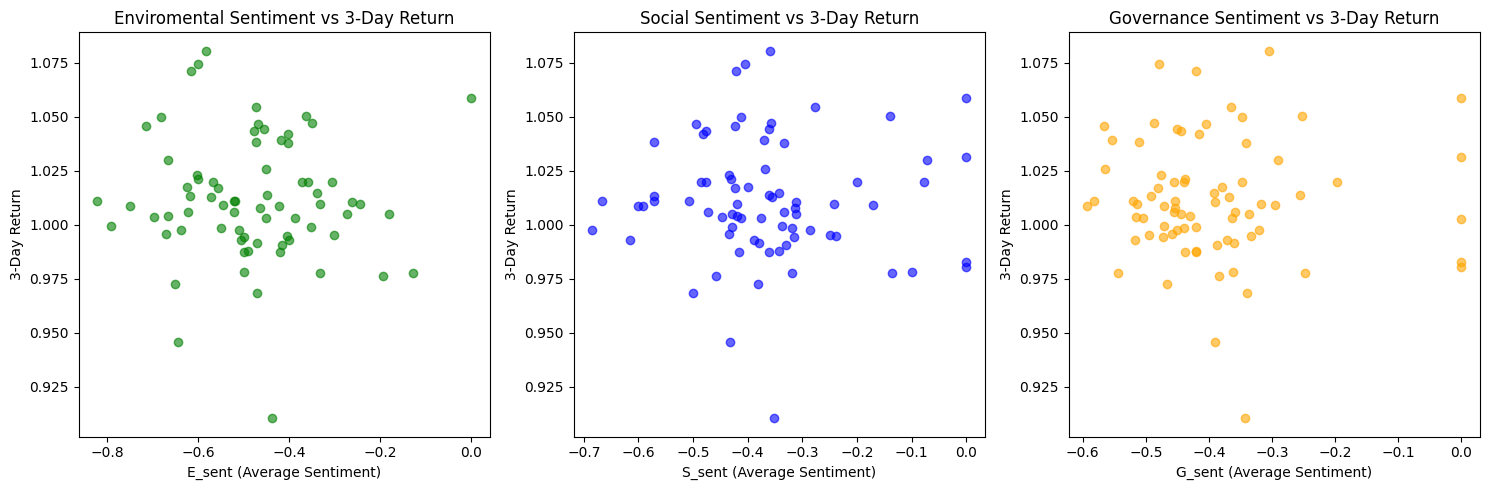

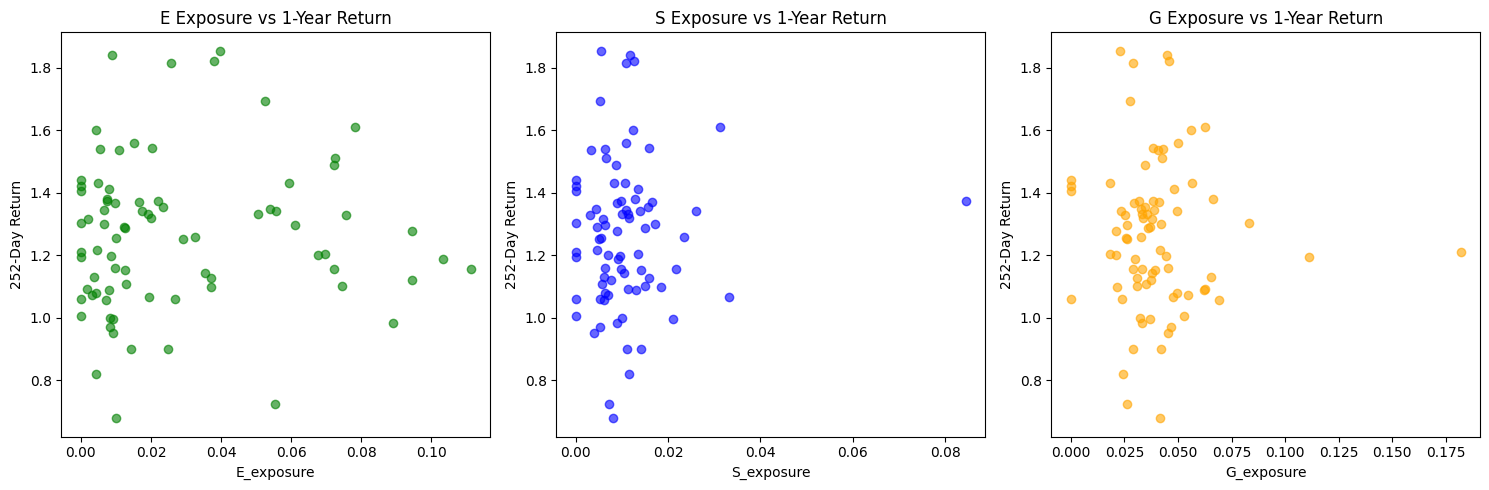


=== PART 5: ESG Exposure Scores (Frequency Ratios) ===


,company,E_exposure,S_exposure,G_exposure
0,C H ROBINSON WORLDWIDE INC,0.022092,0.009747,0.038337
1,BEMIS CO INC,0.035484,0.010323,0.038065
2,PULTE HOMES INC/MI/,0.009892,0.008008,0.041451
3,NATIONAL OILWELL VARCO INC,0.039795,0.005456,0.022786
4,NISOURCE INC/DE,0.050527,0.009994,0.035536


,count,mean,std,min,25%,50%,75%,max
E_exposure,80.0,0.027760,0.029329,0.0,0.007079,0.013579,0.042478,0.111151
S_exposure,80.0,0.010766,0.010641,0.0,0.005610,0.009371,0.013056,0.084442
G_exposure,80.0,0.039713,0.023659,0.0,0.029041,0.036890,0.045583,0.181818


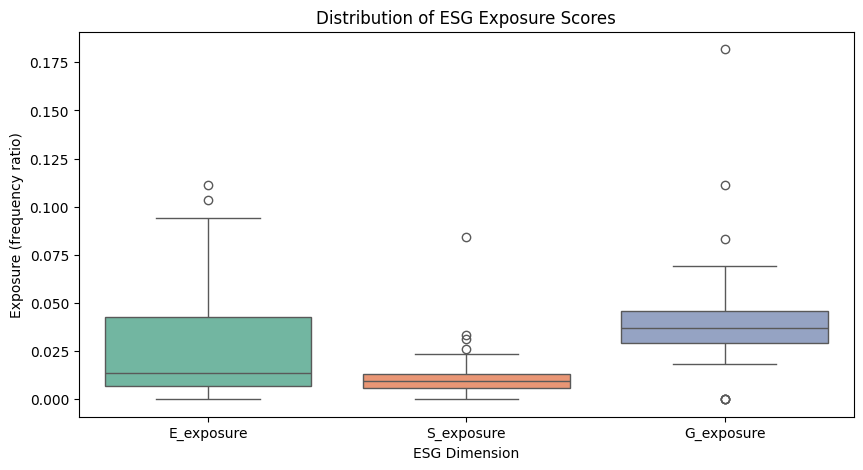

\PART 6: ESG Sentiment Scores (FinBERT averages) ===


,company,E_sent,S_sent,G_sent
0,C H ROBINSON WORLDWIDE INC,-0.489796,-0.342105,-0.420290
1,BEMIS CO INC,-0.193548,-0.458333,-0.383333
2,PULTE HOMES INC/MI/,-0.645161,-0.431818,-0.390244
3,NATIONAL OILWELL VARCO INC,-0.306667,-0.076923,-0.197802
4,NISOURCE INC/DE,-0.423077,-0.592593,-0.470588


,count,mean,std,min,25%,50%,75%,max
E_sent,72.0,-0.479717,0.155234,-0.821429,-0.600000,-0.473684,-0.396591,0.0
S_sent,75.0,-0.363855,0.151522,-0.684211,-0.434633,-0.375000,-0.314836,0.0
G_sent,76.0,-0.391875,0.132982,-0.592593,-0.472301,-0.420229,-0.346396,0.0


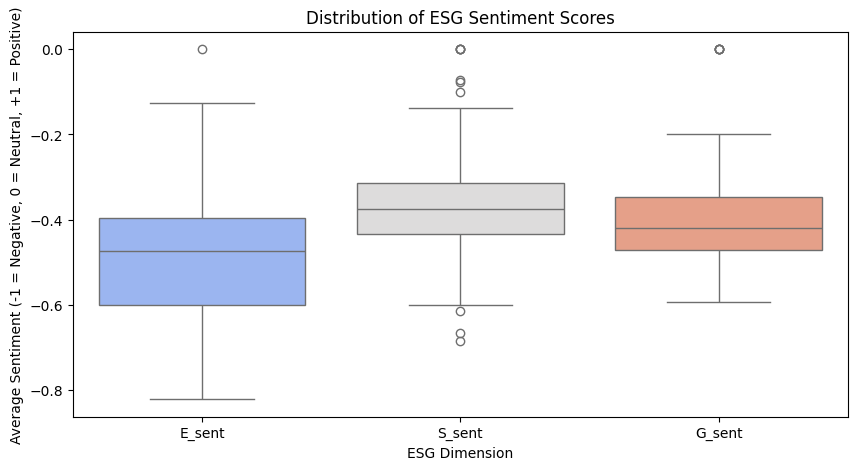

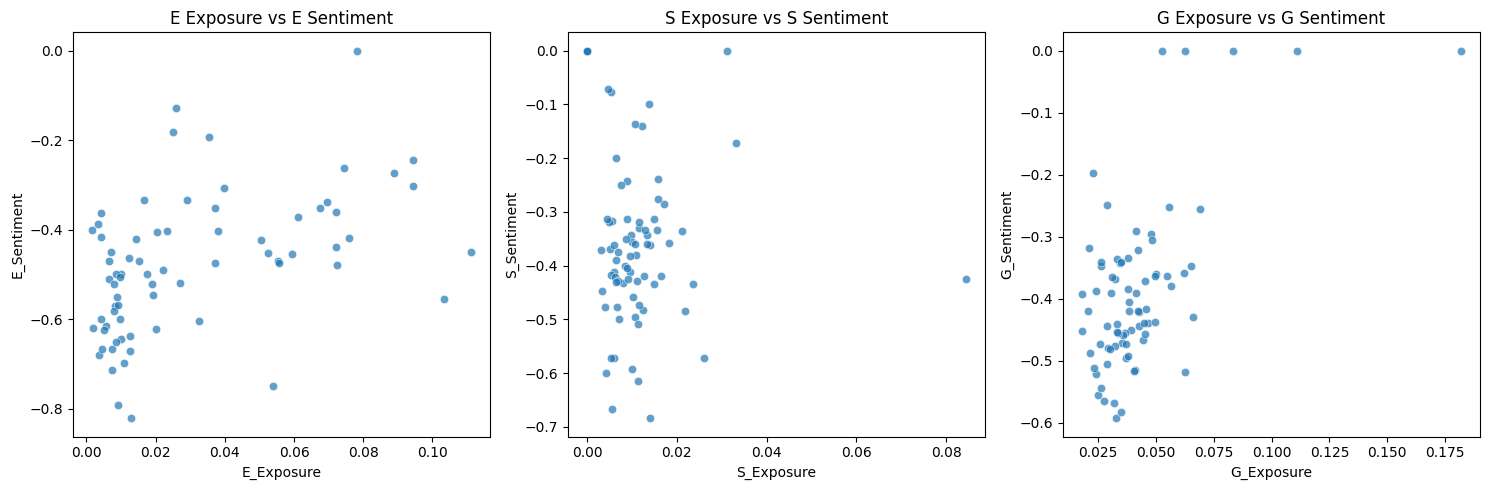

In [1]:
# 1. Setup and reproductibility
import os, random, numpy as np
os.environ["PYTHONHASHSEED"] = "42"
random.seed(42)
np.random.seed(42)

import re, string, pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from datasets import load_dataset
from gensim.models import Word2Vec
from transformers import pipeline
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import seaborn as sns
tqdm.pandas()

# 2. Data selection

DATASET_NAME = "jlohding/sp500-edgar-10k"
N_DOCS = 80

dataset = load_dataset(DATASET_NAME, split="train", streaming=True)


rows = []
for i, item in enumerate(dataset):
    rows.append(item)
    if i >= N_DOCS - 1:
        break

df = pd.DataFrame(rows)
text_col = "item_1A"
df = df[["company", "date", text_col, "3_day_return", "252_day_return"]]
df = df.rename(columns={text_col: "text"})
print("Loaded filings:", len(df))

# 3. Text cleaning and tokenization
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

STOP_WORDS = set(ENGLISH_STOP_WORDS)
PUNCT_TABLE = str.maketrans('', '', string.punctuation)

# Blocking major finance countries and nationalities as they always show up as part of social and governance
BLOCKED_TERMS = {
    # Top financial nations and regions
    "american", "chinese", "british", "japanese", "german", "french", "italian",
    "canadian", "australian", "korean", "indian", "singaporean", "swiss",
    "swedish", "dutch", "spanish", "portuguese", "russian", "saudi", "emirati",
    "qatari", "kuwaiti", "turkish", "israeli", "taiwanese", "malaysian",
    "indonesian", "thai", "vietnamese", "philippine", "mexican", "brazilian",
    "argentinian", "chilean", "colombian", "egyptian", "nigerian", "kenyan",
    "pakistani", "bangladeshi", "european", "asian", "arab", "latin", "african",
    "hong", "kong", "middle", "eastern", "venezuelan" , "iraq", "begun", "dollar", "pound", "sterling", "yen", "ingredients", "officer"
    # Country names (top economies & markets)
    "united", "states", "america", "china", "japan", "india", "germany",
    "france", "canada", "australia", "italy", "brazil", "mexico", "russia",
    "korea", "spain", "uk", "britain", "england", "singapore", "netherlands",
    "switzerland", "sweden", "norway", "denmark", "finland", "saudi", "arabia",
    "turkey", "uae", "israel", "qatar", "kuwait", "vietnam", "thailand",
    "indonesia", "malaysia", "pakistan", "nigeria", "egypt", "chile",
    "argentina", "colombia", "philippines", "south", "africa","afghanistan", "india", "iraq","language", "east"
}

def tokenize(text):
    if not isinstance(text, str) or not text.strip():
        return []

    text = text.lower().translate(PUNCT_TABLE)
    tokens = text.split()

    tokens = [
        t for t in tokens
        if t.isalpha()
        and t not in STOP_WORDS
        and t not in BLOCKED_TERMS
        and len(t) > 2
    ]
    return tokens


df["tokens"] = df["text"].map(tokenize)
print("Avg tokens per filing:", round(df["tokens"].map(len).mean(), 1))


# 4. Training of Word2Vec model

sentences = [s for s in df["tokens"].tolist() if s]
w2v = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=8,
    min_count=5,
    sg=1,
    workers=1,   # I use 1 worker for deterministic results
    epochs=10,
    seed=42      # set random seed for model initialization
)

print("Word2Vec vocab size:", len(w2v.wv))


# 5. Esg word list (Panels A + B of Briscoe-Tran 2025)


# Environmental (Panel A + Panel B)
E_base = [
    "environmental","emission","energy","water","carbon","biodiversity","pollution","green","packaging",
    "renewable","footprint","recycle","disposal","greenhouse","raw","material","renewable","carbon",
    "footprint","oil","spill","global","warming","protection","sustainability","drinking","water",
    "noise","pollution","fossil","fuel","air","pollution","electric","vehicle","solar","panel","wind",
    "turbine","plastic","bag","solar","energy","industrial","automation","nuclear","power",
    # Panel B extensions
    "co2","natural","gas","biofuel","hydrocarbon","irrigation","fertilizer","ethanol","pollutant",
    "geothermal","recycling","purification","agricultural","electricity","ammonia","thermal","hydroelectric",
    "frack","dioxide","forestry","petrochemical","compost","landfill","pesticide","herbicide","lubricant",
    "mining","agriculture","compressor","polymer","chemical","biodegradable","consumption","lng","wastewater",
    "gas","turbine","filtration","coolant","contamination","electric","utility","biomass","waste","nuclear",
    "aluminum","industrial","recyclable","transmission","electrification","inhalation","aluminium","pneumatic"
]

# Social (Panel A + Panel B)
S_base = [
    "human","employee","health","safety","labor","community","labour","social","relation","philanthropy",
    "workforce","citizenship","occupational","human","capital","corporate","citizenship","occupational",
    "health","community","involvement","race","ethnicity","discrimination","harassment","medicaid","medicare",
    "collective","bargaining","resource","age","discrimination","human","trafficking","gender","racial",
    "ethnic","unfair","dismissal","violence","gender","age","diversity","gender","equality","gender",
    "diversity","cultural","diversity",
    # Panel B extensions
    "equality","gender","equality","diversity","equality","social","justice","cultural","diversity",
    "diversity","racial","gender","ethnic","lgbt","cultural","competency","inclusivity","gender","race",
    "gender","diversity","inclusivity","glbt","racial","equity","lgbt","community","cultural","awareness",
    "diversity","gender","diversity","lgbtq","gender","sexuality","diversity","inclusiveness","sex","race",
    "sexual","orientation","lgbtq","community","latino","gender","ethnicity","gender","lgbt","gender",
    "ethnicity","age","gender","antiracism","age","race","indigenous","ethnic","bame","racial","justice",
    "unconscious","bias","gay","lesbian","reproductive","health","race","sex","lgbt","lgbtqia","ethnic",
    "minority","nondiscrimination","transgender","dei","africanamerican","racialethnic","minority"
]

# Governance (Panel A + Panel B)
G_base = [
    "board","governance","shareholder","ethic","practice","corruption","instability","bribery","committee",
    "executive","esg","transparency","ownership","audit","level","management","business","code","conduct",
    "board","director","insider","trading","daytoday","operation","tax","evasion","policy","procedure",
    "track","record","regulatory","scrutiny","unethical","behavior","nepotism","cronyism","law","violation",
    # Panel B extensions
    "leadership","unethical","practice","compliance","impropriety","cronyism","legal","compliance",
    "embezzlement","integrity","regulator","organization","conflict","interest","organizational",
    "fraudulent","activity","cronyism","nepotism","questionable","ethic","money","laundering","collusion",
    "strategic","planning","accountability","decisionmaking","strategy","antitrust","hypocrisy",
    "mismanagement","scandal","dishonesty","irresponsibility","unethical","behaviour","dysfunction",
    "gross","negligence","misuse","fund","cfpb","illegal","activity","investigation","strategy","regulatory",
    "risk","aversion","indict","political","infighting","gross","incompetence","partnership","decision",
    "making","due","diligence","operational","nepotism","principle"
]



# 6. Word2Vec utility functions

def get_vocab(model):
    if hasattr(model, "wv"):
        model = model.wv
    if hasattr(model, "key_to_index"):
        return set(model.key_to_index.keys())
    elif hasattr(model, "vocab"):
        return set(model.vocab.keys())
    else:
        raise AttributeError("No recognized vocab atribute found in model.")

def in_vocab(words, model):
    vocab = get_vocab(model)
    return [w for w in words if w in vocab]

def expand_with_neighbors(base_words, model, n=12, min_sim=0.80):
    vocab = get_vocab(model)
    expanded = set(base_words)
    for w in base_words:
        if w not in vocab:
            continue
        try:
            for cand, sim in model.wv.most_similar(w, topn=n):
                if sim >= min_sim and cand.isalpha() and len(cand) > 2:
                    expanded.add(cand)
        except Exception:
            continue
    return sorted(expanded)

E_ref = expand_with_neighbors(in_vocab(E_base, w2v), w2v)
S_ref = expand_with_neighbors(in_vocab(S_base, w2v), w2v)
G_ref = expand_with_neighbors(in_vocab(G_base, w2v), w2v)

# Show changes made
E_new = set(E_ref) - set(E_base)
S_new = set(S_ref) - set(S_base)
G_new = set(G_ref) - set(G_base)
print(f"Expanded ESG lexicons -> E:{len(E_ref)}, S:{len(S_ref)}, G:{len(G_ref)}")
print("Top 10 new Environmental words:", list(E_new)[:10])
print("Top 10 new Social words:", list(S_new)[:10])
print("Top 10 new Governance words:", list(G_new)[:10])


# 7. ESG exposure calculation

def esg_exposure(tokens, vocab):
    if not tokens:
        return 0
    return sum(t in vocab for t in tokens) / len(tokens)

df["E_exposure"] = df["tokens"].map(lambda x: esg_exposure(x, set(E_ref)))
df["S_exposure"] = df["tokens"].map(lambda x: esg_exposure(x, set(S_ref)))
df["G_exposure"] = df["tokens"].map(lambda x: esg_exposure(x, set(G_ref)))


# 8. Sentiment analysis using (FinBERT)

MODEL_NAME = "ProsusAI/finbert"
clf = pipeline("sentiment-analysis", model=MODEL_NAME, device=-1)
label_map = {"positive": 1, "negative": -1, "neutral": 0}

def esg_sentiment(text, keywords):
    if not isinstance(text, str) or not text.strip():
        return np.nan
    sents = re.split(r"(?<=[.!?])\s+", text)
    vals = []
    for s in sents:
        if any(k in s.lower() for k in keywords):
            try:
                out = clf(s[:512])[0]
                vals.append(label_map.get(out["label"].lower(), 0))
            except Exception:
                continue
    return np.mean(vals) if vals else np.nan

df["E_sent"] = df["text"].progress_map(lambda t: esg_sentiment(t, E_ref))
df["S_sent"] = df["text"].progress_map(lambda t: esg_sentiment(t, S_ref))
df["G_sent"] = df["text"].progress_map(lambda t: esg_sentiment(t, G_ref))


# 9. ESG score/return correlations

def corr_report(df, xs, ys):
    out = {}
    for x in xs:
        for y in ys:
            out[f"{x}_{y}"] = df[[x, y]].corr().iloc[0, 1]
    return pd.Series(out).round(3)

corrs = corr_report(
    df,
    ["E_exposure","S_exposure","G_exposure","E_sent","S_sent","G_sent"],
    ["3_day_return","252_day_return"]
)
print("\n=== CORRELATION RESULTS ===")
display(corrs.to_frame("Correlation"))


# 10. Visualsations and plots

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(df["E_sent"], df["3_day_return"], color="green", alpha=0.6)
plt.title("Enviromental Sentiment vs 3-Day Return")
plt.xlabel("E_sent (Average Sentiment)")
plt.ylabel("3-Day Return")

plt.subplot(1,3,2)
plt.scatter(df["S_sent"], df["3_day_return"], color="blue", alpha=0.6)
plt.title("Social Sentiment vs 3-Day Return")
plt.xlabel("S_sent (Average Sentiment)")
plt.ylabel("3-Day Return")

plt.subplot(1,3,3)
plt.scatter(df["G_sent"], df["3_day_return"], color="orange", alpha=0.6)
plt.title("Governance Sentiment vs 3-Day Return")
plt.xlabel("G_sent (Average Sentiment)")
plt.ylabel("3-Day Return")

plt.tight_layout()
plt.show()

# Exposures vs Longterm Returns
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(df["E_exposure"], df["252_day_return"], color="green", alpha=0.6)
plt.title("E Exposure vs 1-Year Return")
plt.xlabel("E_exposure"); plt.ylabel("252-Day Return")

plt.subplot(1,3,2)
plt.scatter(df["S_exposure"], df["252_day_return"], color="blue", alpha=0.6)
plt.title("S Exposure vs 1-Year Return")
plt.xlabel("S_exposure"); plt.ylabel("252-Day Return")

plt.subplot(1,3,3)
plt.scatter(df["G_exposure"], df["252_day_return"], color="orange", alpha=0.6)
plt.title("G Exposure vs 1-Year Return")
plt.xlabel("G_exposure"); plt.ylabel("252-Day Return")

plt.tight_layout()
plt.show()

# PART 5: ESG Exposures
print("\n=== PART 5: ESG Exposure Scores (Frequency Ratios) ===")
display(df[["company","E_exposure","S_exposure","G_exposure"]].head())

# summary stastics
exposure_summary = df[["E_exposure","S_exposure","G_exposure"]].describe().T
display(exposure_summary)

# visualise exposures
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["E_exposure","S_exposure","G_exposure"]], palette="Set2")
plt.title("Distribution of ESG Exposure Scores")
plt.ylabel("Exposure (frequency ratio)")
plt.xlabel("ESG Dimension")
plt.show()


# ESG Sentiments 
print("\PART 6: ESG Sentiment Scores (FinBERT averages) ===")
display(df[["company","E_sent","S_sent","G_sent"]].head())

# summary statistics
sent_summary = df[["E_sent","S_sent","G_sent"]].describe().T
display(sent_summary)

# visualise sentiment distribution
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["E_sent","S_sent","G_sent"]], palette="coolwarm")
plt.title("Distribution of ESG Sentiment Scores")
plt.ylabel("Average Sentiment (-1 = Negative, 0 = Neutral, +1 = Positive)")
plt.xlabel("ESG Dimension")
plt.show()

# scatter sentiment vs exposure per dimension
fig, axes = plt.subplots(1,3, figsize=(15,5))
for i, dim in enumerate(["E","S","G"]):
    sns.scatterplot(
        x=df[f"{dim}_exposure"], 
        y=df[f"{dim}_sent"], 
        alpha=0.7, ax=axes[i]
    )
    axes[i].set_title(f"{dim} Exposure vs {dim} Sentiment")
    axes[i].set_xlabel(f"{dim}_Exposure")
    axes[i].set_ylabel(f"{dim}_Sentiment")
plt.tight_layout()
plt.show()


### Interpretation of results

This study analyzed 80 S&P 500 firms’ Risk Factors sections from their 10-K filings to explore how ESG-related language relates to short and longterm stock performance. Each filing contained an average of 2,670 words and the trained Word2Vec model generated a vocabulary of 3,826 unique terms thus demonstrating sufficient linguistic richness to extract contextual associations between ESG concepts. Using refined Briscoe-Tran (2025) lexicons, the model identified environmental, social, and governance-related language in corporate disclosures.

The exposure results show that governance related terms have the highest average frequency (mean 0.0397) followed by environmental (0.0278) and then social exposure (0.0108) being the lowest. This hierarchy indicates that firms devote greater attention to governance topics such as compliance, board oversight, and transparency—compared to social or environmental concerns. The boxplot distributions further illustrate that while most firms mention ESG issues only briefly,a few display very high exposure values, especially for governance. This skewed pattern suggests that ESG discussion intensity is uneven across firms thus possibly reflecting differences in industry regulation or reporting culture.

Looking at my sentiment results, FinBERT analysis shows that the tone of ESG related sentences is predominantly negative across all dimensions. The mean environmental sentiment (-0.48) is the most negative, followed by governance (-0.39) and social (-0.36). This negativity is expected, as the Risk Factors section emphasizes potential liabilities, compliance risks and uncertainties. For instance environmental language likely centers around emission costs, resource scarcity, and climate regulation, while governance and social terms often appear in contexts of litigation risk or employee related challenges. Despite the negative polarity the narrow range of sentiment scores (with few positive outliers) indicates consistency across firms in framing ESG topics as areas of caution.

The correlation analysis between ESG measures and returns reveals weak relationships overall. For short-term (3-day) returns we can see that all correlations are close to zero, suggesting that markets do not immediately react to ESG-related language within filings. However, for long-term (252-day) returns, social exposure (r = 0.22) and social sentiment (r = 0.22) show small positive correlations. This suggests that companies discusing social factors such as workforce well-being, diversity, or community engagement may experience slightly better performance over the following year. Investors could be rewarding firms that communicate stronger social awareness, perceiving them as more resilient or ethically aligned. In contrast, environmental and governance dimensions show negligible or slightly negative correlations with returns thus implying that the market interprets these discussions as standard compliance or regurlatory obligations rather than indicators of strategic advantage.

The scatterplots visualize these findings effectively. In the sentiment return plots, there is no strong linear trend, but clustering around neutral to negative sentiment levels confirms that most firms maintain a cautious tone regardless of their market performance. Similarly, the exposure–return plots display dispersed points without clear directional relationships, suggesting that mentioning ESG terms more frequently does not directly predict higher or lower returns. When comparing exposure to sentiment within each dimension, no strong association emerges; firms that discuss ESG topics more frequently do not necessarily do so in a more positive tone. This eparation between frequency and tone underscores that ESG communication in risk disclosures is largely formal and compliance-driven rather than strategically expressive.

Overall, the findings indicate that ESG language in risk disclosures remains conservative, uniform, and risk-oriented. Governance dominates in frequency, environmental discussions carry the most negative tone, and only social factors show weakly positive relationships with longterm performance. These results align with the idea that social disclosures adressing employees, equity, and diversity—may be more relevant to investors perceptions of firm quality and reputation.

Furthermore, the limitations of my model should be acknowledged. The dataset is limited to 80 filings, which restricts statistical power to add to this the analysis focuses solely on the Risk Factors section, which naturally emphasizes threats rather than achievements leading to predominantly negative sentiment. Additionally, FinBERT, though tailored for financial text, may interpret precautionary language (e.g, “risk of non-compliance”) as negative even when it signals responsible governance. The Word2Vec model’s stochastic nature can also cause minor variations in expanded vocabulary, finally, correlation does not imply causation—firms with strong social messaging might perform better for reasons unrelated to disclosure tone.

In summary ESG mentons are prevalent but framed around obligations rather than optimism, furthermore, governance dominates in coverage, environmental content is framed negatively and social factors emerge as the most economically meaningful. While the correlations remain modest, these results highlight that the market may pay closer attention to socially responsible narratives, though the overall financial effect of ESG wording in regulatory filings remains subtle.

## Task 3 — Reflection on Learning and Authenticity


### Use of Generative AI

**Use of AI Declaration**


+ I completed the question **with** assistance from AI. Here is the link to the conversation: https://chatgpt.com/share/69075879-f5d8-800a-b77b-b6452176a0df

### Journey and Learning through the unit
Throughout this unit I developed a deep liking as well as appreciation for how machine learning can be applied to financial problems and how powerful it can be in uncovering insights that traditional financial analysis might miss. The lab structure was particularly effective in my opinion as it gradually progressed from foundational supervised learning models like logistic regression and random forests to unsupervised learning methods such as PCA and clustering, and finally to deep learning and NLP. I found PCA fascinating for how it reduced complex financial data into a few interpretable components, and clustering helped me visualise relationships between assets in entirely new ways.

The deep learning labs were challenging yet rewarding, Training the  MLP and LSTM models to predict stock price movements forced me to think critically about data scaling, model architecture, and overfitting. The NLP component was especially interesting as it showed how text data from financial reports could be quantified and analysed for sentiment. I even had a dream about creating an app that scrapes YouTube comments from content creators and uses sentiment analysis to tell them exactly what kind of video to make next based on the sentiments of the audience, opinions as well as comparisons of comments between videos, thus helping creators quantify in a way what content their viewers want to watch and thus helping them target more and grow. This made me realize how transferable these tools are beyond finance.

### Challenges faced

One of my biggest challenges came during my first individual assignment when the pandas_ta library completely refused to work. After hours of frustration and failed debugging attempts I decided to manually construct every technical indicator myself. I rebuilt RSI, MACD, ATR, Bollinger Bands, and several volatility measures directly using pandas and NumPy while reading the Pandas_ta documentation on the methods they use for calculations. While it was a tedious process, it taught me more about feature engineering and the inner workings of financial indicators than any pre built library could have. I developed a genuine understanding of how each signal is derived mathematically and how parameter tuning impacts its responsiveness to market movements.

Later in the semester I encountered another significant challenge while working on the NLP-based sentiment analysis task. My initial implementation was very inefficient and and each run took more than 40 minutes to complete. This made iteration very slow and minor adjustment to preprocessing or tokenisation required another lengthy wait. To manage this, I experimented with batch processing, model caching and selective sampling to test smaller subsets before scaling up to the full dataset. Furthermore I used AI to help me make my loops and code more efficient. There were also several frustrating moments where even small mistakes like mismatched index lengths, incorrect reshaping of sequence inputs and even spelling mistakes, because of the challenge of tying the first and this project together, caused the entire training pipeline to crash. Fixing these required carefully tracing through each step of the preprocessing, scaling, and sequence building functions to ensure consistency between the ML and LSTM models.
### Authenticity of work

To ensure authenticity and integrity, I always wrote my code from scratch and iterated until it ran correctly. When I encountered errors, I used AI to debug, clarify concepts and identify ways to make my code more efficient. Once the code worked, I often asked for feedback on whether it could be improved stylistically or computationally. Every line of analysis was my own original work however, I did use AI to help me correct my grammar and sentence stucture as well as make my analysis sound more formal. I also found it important to not only attach a link of my AI conversations but to also explain my use more in detail in a seperate section in my previous assignment.

### How this unit has helped me and how it will help in the future

Towards the end of the semester I actually applied for and spoke with a Monash researcher (Paulo Santos)  working on biodiversity restoration and carbon sequestration. I discussed how some of the methods from this unit could be applied to environmental datasets which led to a paid research scholarship from November to December!. This connection reminded me that the analytical and coding skills I’ve gained here can make an impact well beyond finance. Furthermore, I actually have now switched my job hunt focus from mainly finance related jobs to now those involving ML, Data analytics and econometrics as I genuinly feel more confident in these aspects.